<a href="https://colab.research.google.com/github/AhmedB479/Monte-Carlo-On-PSX/blob/main/Monte_Carlo_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install psx-data-reader

In [ ]:
import psx
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import norm

https://www.investing.com/indices/karachi-100-historical-data

In [ ]:
data = pd.DataFrame()
ticker = 'ILP'

In [ ]:
#for index
kse100 = pd.read_csv('Karachi 100 Historical Data.csv')
kse100

,Date,Price,Open,High,Low,Vol.,Change %
0,06/12/2024,"72,797.43","72,545.24","73,169.00","72,464.24",106.50M,0.29%
1,06/11/2024,"72,589.49","73,779.99","73,866.45","72,476.05",142.11M,-0.91%
2,06/10/2024,"73,252.56","73,841.92","73,915.45","72,981.35",89.48M,-0.68%
3,06/07/2024,"73,754.02","73,805.95","73,902.79","71,781.96",208.27M,-0.15%
4,06/06/2024,"73,862.93","74,276.84","74,593.33","73,768.40",112.74M,-0.48%
...,...,...,...,...,...,...,...
3462,06/21/2010,"9,651.31","9,646.32","9,691.53","9,608.63",NaN,0.06%
3463,06/18/2010,"9,645.71","9,704.50","9,820.35","9,611.17",NaN,-0.32%
3464,06/17/2010,"9,676.71","9,405.73","9,709.88","9,320.49",NaN,2.54%
3465,06/16/2010,"9,436.88","9,285.74","9,481.83","9,274.55",NaN,2.01%


In [ ]:
all_tickers = psx.tickers()
all_tickers[all_tickers['symbol'] == ticker]
if ticker not in all_tickers['symbol']:
  data = psx.stocks(ticker, start=datetime.date(2019, 4, 5), end=datetime.date.today())
else:
  print("Ticker not found")

In [ ]:
test = data
test.insert(0,"index",range(0,len(data)),True)
test.insert(1,"date",data.index.date,True)
test.set_index("index",drop=True,inplace=True)
test['date'] = pd.to_datetime(test['date'])

In [ ]:
test.to_csv(f"{ticker}.csv",index=True)

In [ ]:
df = pd.read_csv(f"{ticker}.csv")

In [ ]:
df

,index,date,Open,High,Low,Close,Volume
0,0,2019-04-05,48.00,48.20,45.75,46.15,14321500.0
1,1,2019-04-08,45.74,46.00,43.85,45.09,1364000.0
2,2,2019-04-09,45.21,46.20,44.00,45.24,674500.0
3,3,2019-04-10,45.35,45.67,42.98,43.11,252500.0
4,4,2019-04-11,41.75,45.23,41.75,44.78,460000.0
...,...,...,...,...,...,...,...
1269,1269,2024-05-24,83.03,85.40,83.00,84.08,450937.0
1270,1270,2024-05-27,83.60,84.50,83.00,83.13,144858.0
1271,1271,2024-05-29,83.89,83.89,80.00,80.89,292726.0
1272,1272,2024-05-30,81.38,82.00,80.02,81.05,163124.0


In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=df['date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)])
fig.add_trace(go.Bar(
    x=df['date'],
    y=df['Volume'],
    name='Volume',
    marker_color='rgba(0, 0, 255, 0.5)',
    yaxis='y2'
))
fig.update_layout(
    title="Interloop stocks",
    xaxis_title="Date",
    yaxis_title="Price(PKR)",
    yaxis2=dict(title='Volume',
                overlaying='y',
                side='right'),
    legend=dict(x=0,y=1)
)
fig.show()

# Basic Monte Carlo Sim

Text(0, 0.5, 'Frequency')

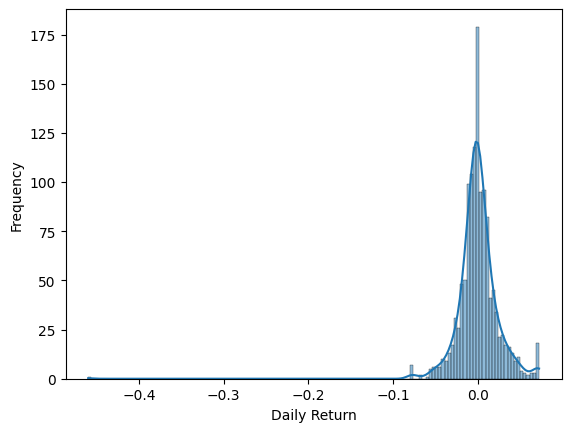

In [ ]:
#Log returns
log_return = np.log(1+df['Close'].pct_change())

sns.histplot(log_return.iloc[1:],kde=True)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [ ]:
# Compute the Drift
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)

In [ ]:
#variance and daily returns
stdev = log_return.std()
days = 50
trails = 10000
z = norm.ppf(np.random.rand(days,trails))
daily_returns = np.exp(drift + stdev * z)

In [ ]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = df['Close'].iloc[-1]
for t in range(1,days):
  price_paths[t] = price_paths[t-1]*daily_returns[t]

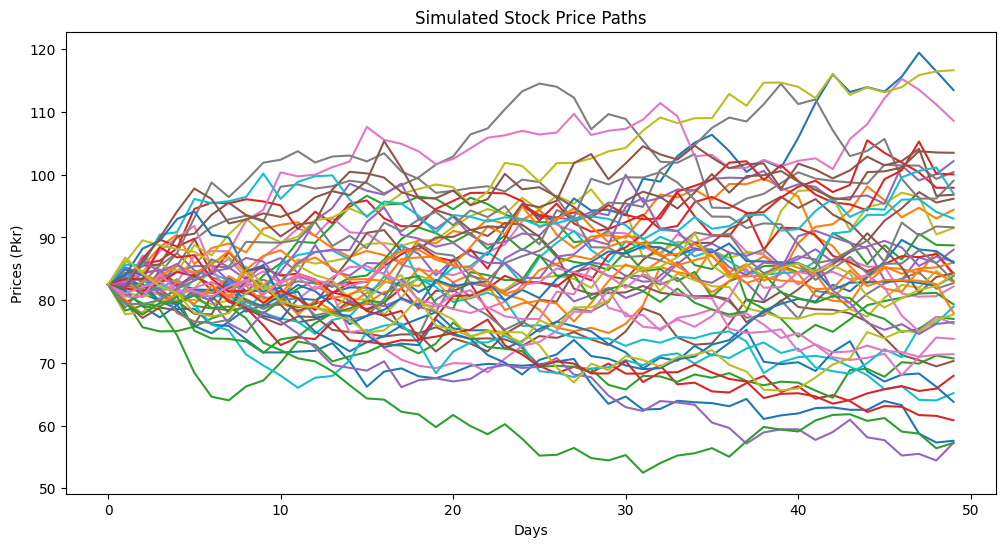

In [ ]:
plt.figure(figsize=(12,6))
for i in range(1,days):
  plt.plot(price_paths[:,i],lw=1.5)

plt.title('Simulated Stock Price Paths')
plt.xlabel('Days')
plt.ylabel('Prices (Pkr)')
plt.show()

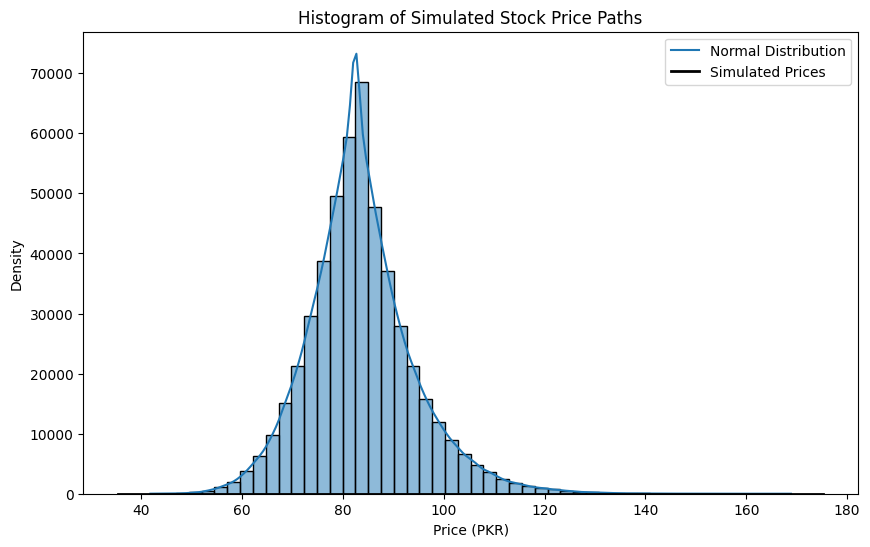

In [ ]:
price_paths_flat = price_paths.flatten()
plt.figure(figsize=(10,6))
sns.histplot(price_paths_flat,bins=50,kde=True)

xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x,price_paths_flat.mean(),price_paths_flat.std())
plt.plot(x,p,'k',linewidth=2)

plt.title('Histogram of Simulated Stock Price Paths')
plt.xlabel('Price (PKR)')
plt.ylabel('Density')
plt.legend(['Normal Distribution', 'Simulated Prices'])
plt.show()

https://medium.com/analytics-vidhya/monte-carlo-simulations-for-predicting-stock-prices-python-a64f53585662

# Automating the Monte Carlo Simulations and Showing CAPM Metrics

In [ ]:
def log_returns(data):
  return (np.log(1+data.pct_change()))

In [ ]:
def drift_calc(data):
  lr = log_returns(data)
  u = lr.mean()
  var = lr.var()
  drift = u-(0.5*var)
  try:
    return drift.values
  except:
    return drift

In [ ]:
def daily_returns(data,days, iterations):
  ft = drift_calc(data)
  try:
    stv = log_returns(data).std().values
  except:
    stv = log_returns(data).std()

  dr = np.exp(ft + stv * norm.ppf(np.random.rand(days,iterations)))
  return dr

daily_returns(df['Close'],50,1000)

array([[1.01509184, 0.96812733, 1.03456022, ..., 0.9822213 , 0.97816405,
        0.99815408],
       [0.96946606, 0.99830573, 0.96339045, ..., 1.02433804, 1.01447461,
        1.04078597],
       [0.99090803, 1.02801359, 1.04105339, ..., 0.98484832, 1.00012815,
        1.01545228],
       ...,
       [0.97377559, 0.98768063, 1.02366983, ..., 1.03202726, 0.99544406,
        1.00264303],
       [1.00836274, 1.00251379, 1.00771886, ..., 1.004593  , 1.03940249,
        1.03050752],
       [1.02581262, 1.01782286, 1.02031245, ..., 0.98769467, 0.95619302,
        0.97156425]])

In [ ]:
#Compute the Sharpe Ratio, the risk-adjusted returns and the Beta of every stock.
def beta_sharpe(data,index=pd.read_csv('Karachi 100 Historical Data.csv'),start='2010-6-15',riskfree=0.22):
